# Student Performance Prediction System

Import Libraries

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

Read the Dataset 

In [11]:
df = pd.read_csv('Student_Performance.csv')
df.head() # Returns  the first 5 rows of the Data Frame 

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


Get all the details of the Dataset

In [12]:
df.shape # returns the no of rows and columns in the data frame

(10000, 6)

In [13]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  str    
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), str(1)
memory usage: 468.9 KB


Check Missing and Duplicate values in the dataset

In [14]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(127)

In [15]:
df[df.duplicated(keep=False)]


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
202,9,52,No,5,9,48.0
212,5,41,No,8,4,26.0
415,2,81,No,6,1,59.0
426,9,86,Yes,6,9,83.0
507,4,70,Yes,6,8,53.0
...,...,...,...,...,...,...
9644,4,91,Yes,4,3,71.0
9940,8,95,No,5,2,90.0
9954,6,97,No,8,7,92.0
9966,1,41,No,7,3,12.0


In [16]:
df = df.drop_duplicates()


In [17]:
df.shape

(9873, 6)

In [18]:
df.duplicated().sum()

np.int64(0)

Change categorical(str) columns into numerical cols


In [19]:
df['Extracurricular Activities'].value_counts()

Extracurricular Activities
No     4986
Yes    4887
Name: count, dtype: int64

In [20]:
df['Extracurricular Activities'] = df['Extracurricular Activities'].replace({
    'Yes': 1,
    'No': 0
})


In [21]:
df['Extracurricular Activities'] = df['Extracurricular Activities'].astype(int)


In [22]:
df.info()

<class 'pandas.DataFrame'>
Index: 9873 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     9873 non-null   int64  
 1   Previous Scores                   9873 non-null   int64  
 2   Extracurricular Activities        9873 non-null   int64  
 3   Sleep Hours                       9873 non-null   int64  
 4   Sample Question Papers Practiced  9873 non-null   int64  
 5   Performance Index                 9873 non-null   float64
dtypes: float64(1), int64(5)
memory usage: 539.9 KB


In [24]:
from sklearn.ensemble import IsolationForest
import pandas as pd


model = IsolationForest(contamination=0.05, random_state=42)

outlier_labels = model.fit_predict(df)
print(outlier_labels)

# -1 = outlier, 1 = normal
clean_df = df[outlier_labels == 1]

print(clean_df.shape)


[-1  1  1 ...  1 -1  1]
(9379, 6)


Correlation

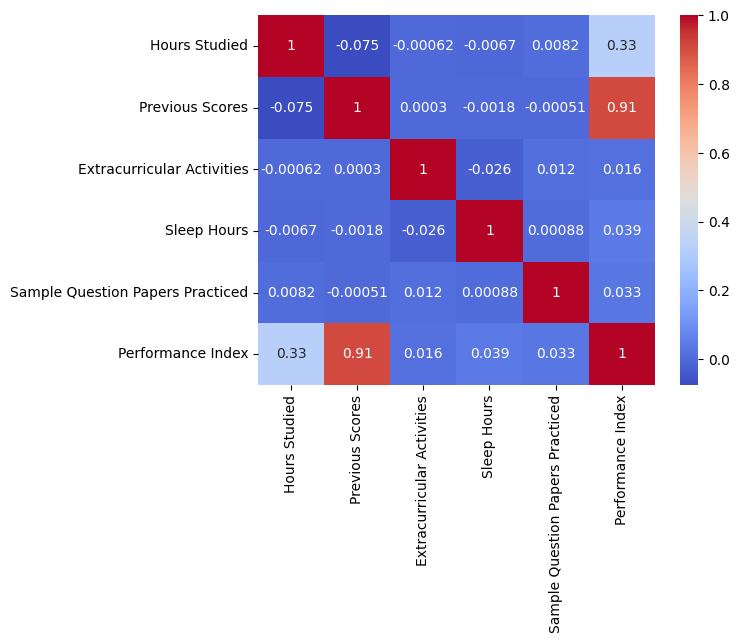

In [25]:
corr = clean_df.corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.show()

In [26]:
#Select Features
X = clean_df.drop(columns=['Performance Index'])
y = clean_df['Performance Index']

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [28]:
print(X_train.shape)

(7503, 5)


In [29]:
from sklearn.linear_model import LinearRegression


model = LinearRegression()

model.fit(X_train,y_train)


,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [30]:
y_pred = model.predict(X_test)
print(y_pred)

[42.49022675 89.84471489 40.55358373 ... 31.04508822 54.04560966
 63.7714615 ]


In [31]:
from sklearn.metrics import r2_score

r2_score = r2_score(y_test,y_pred)
print("R2 Score:",r2_score)

R2 Score: 0.9868672715562188


In [32]:
from sklearn.metrics import r2_score


r2_train = r2_score(y_train, model.predict(X_train))
r2_test  = r2_score(y_test, model.predict(X_test))
print(r2_train)
print(r2_test)


0.987412348400255
0.9868672715562188


In [33]:
if r2_train > r2_test:
    print("The model is overfitting")

The model is overfitting


In [34]:
from sklearn.metrics import mean_squared_error
import numpy as np

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)


print("RMSE:", rmse)


RMSE: 2.050644269902844


In [35]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)


MAE: 1.6268535377909152


In [36]:
import joblib
joblib.dump(model,"student.pkl")
print("Model Saved Successfully")

Model Saved Successfully
